In [300]:
import sys
sys.path.append ('/Users/svijay/anaconda/conda-meta​/quandl')

In [301]:
import os
os.getcwd()

'/Users/svijay/Desktop/MLND/Projects/ML_for_Trading'

In [302]:
from pandas_datareader import data as web

In [303]:
import pandas as pd
import pandas.io.data as web
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

% matplotlib inline

In [304]:
quandl_api_key = 'mZVQQvXD5sf8K-EpY8d5'

In [305]:
start = '2014-2-1'
end = 'today'
symbols = [ '^NSEI','KOTAKBANK.NS','YESBANK.NS','INDUSINDBK.NS', 'MANINFRA.NS','CIPLA.NS','SUNPHARMA.NS','AXISGOLD.NS','^NSEBANK','HCLTECH.NS','BPCL.NS',]

data = pd.DataFrame ()
for sym in symbols:
    data [sym]= web.DataReader (name = sym, data_source= 'yahoo', start = start, end= end)['Adj Close']
    if sym == '^NSEI':  # drop dates NSE did not trade
        data = data.dropna(subset=['^NSEI'])    
    data.fillna(method="ffill", inplace="True") # Forward fill empty trade dates
    data.fillna(method="bfill", inplace="True") # backfill empty trade date
data.columns = symbols    

train_len = int (len (data)*0.7)
test_len_1 = int (len(data)*0.8)
test_len_2 = int (len(data))

print type (data)
data_train = data [:train_len]
data_test = data [test_len_1:test_len_2]

print len (data_test)

<class 'pandas.core.frame.DataFrame'>
149


# Strategy 1 - SMA

In [306]:
nse = data ['^NSEI']
nse = pd.DataFrame (nse)
nse['Price'] = nse
del nse ['^NSEI']
print nse.head()

                  Price
Date                   
2014-02-03  6001.799805
2014-02-04  6000.899902
2014-02-05  6022.399902
2014-02-06  6036.299805
2014-02-07  6063.200195


In [307]:
nse ['SMA1'] = nse ['Price'].rolling(42).mean()
nse ['SMA2'] = nse ['Price'].rolling(252).mean()

In [308]:
print nse.tail()

                  Price         SMA1         SMA2
Date                                             
2017-02-15  8724.700195  8405.060663  8198.508927
2017-02-16  8778.000000  8421.099947  8204.027776
2017-02-17  8821.700195  8438.702335  8210.073411
2017-02-20  8879.200195  8458.176153  8216.674601
2017-02-21  8907.849609  8480.289237  8224.339282


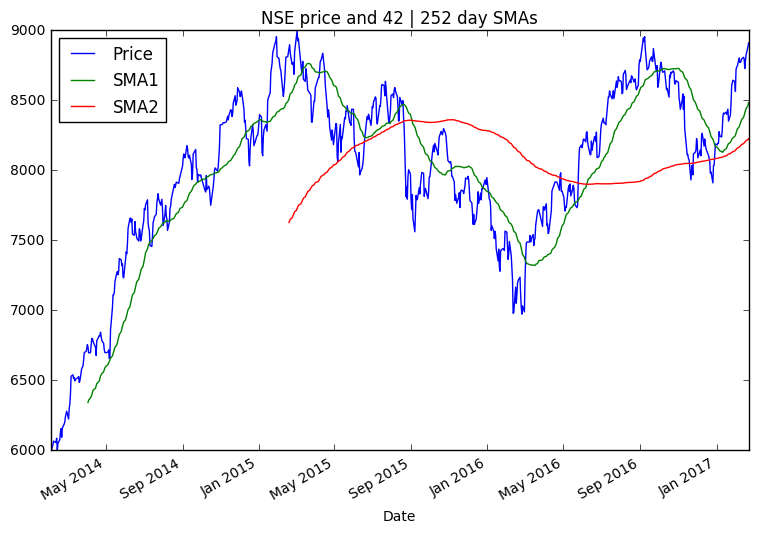

In [309]:
nse.plot (title ="NSE price and 42 | 252 day SMAs", figsize = (9,6))

745
Date
2015-02-18    1
2015-02-19    1
2015-02-20    1
2015-02-23    1
2015-02-24    1
Name: Position, dtype: int64


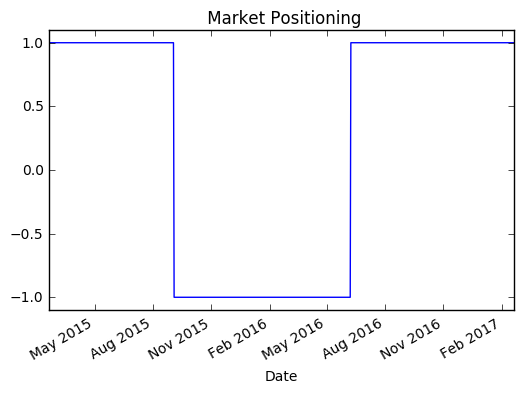

In [310]:
nse ['Position'] = np.where (nse['SMA1'] > nse ['SMA2'],1,-1)
print len(nse ['Position'])
nse.dropna(inplace = True)
print nse ['Position'].head()
nse ['Position'].plot (ylim = [-1.1,1.1], title = " Market Positioning")

In [311]:
nse ['returns'] = np.log (nse ['Price']/nse ['Price'].shift(1))

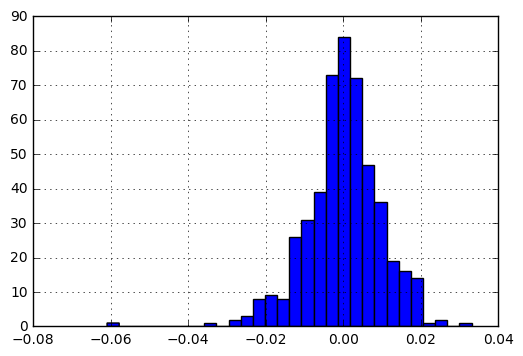

In [312]:
nse ['returns'].hist (bins = 30)

In [313]:
# subsetting nse dataframe
x = nse ['returns'] >  0
y = nse ['Position'] == - 1
nse [x & y]

,Price,SMA1,SMA2,Position,returns
Date,,,,,
2015-09-03,7823.000000,8343.983282,8354.373818,-1,0.013642
2015-09-08,7688.250000,8292.791620,8351.111317,-1,0.016981
2015-09-09,7818.600098,8277.528518,8350.645246,-1,0.016812
2015-09-11,7789.299805,8244.183292,8349.039491,-1,0.000154
2015-09-14,7872.250000,8226.664249,8348.202984,-1,0.010593
2015-09-16,7899.149902,8191.305920,8346.289094,-1,0.008908
2015-09-18,7981.899902,8178.269008,8345.872625,-1,0.010421
2015-09-23,7845.950195,8128.035691,8342.753974,-1,0.004336
2015-09-24,7868.500000,8116.309501,8341.892069,-1,0.002870


In [314]:
nse ['Strategy'] = nse ['Position'].shift(1) * nse ['returns']

In [315]:
nse [['returns', 'Strategy']].sum()

returns     0.004360
Strategy   -0.107511
dtype: float64

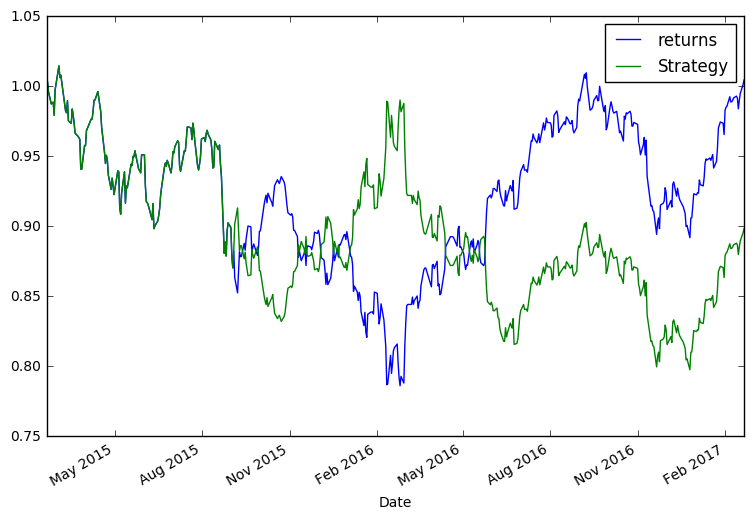

In [316]:
nse [['returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize = (9,6))

In [317]:
# annual returns of symbol and strategy

nse [['returns', 'Strategy']].mean() * 252

returns     0.002228
Strategy   -0.054955
dtype: float64

In [318]:
# annual std of symbol and strategy

nse [['returns', 'Strategy']].std() * 252 ** 0.5

returns     0.154025
Strategy    0.153986
dtype: float64

# Strategy - Momentum

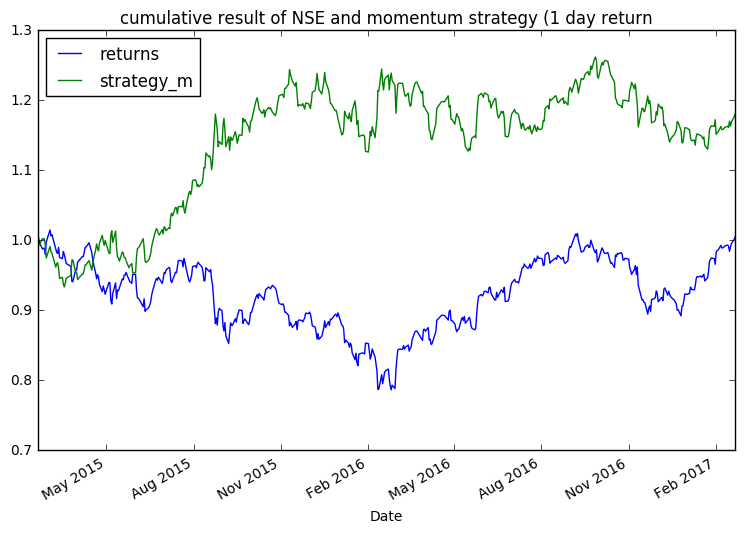

In [319]:
nse ['position_m'] = np.sign (nse['returns']) # represents long or short position(1 or -1)for the foll day based on 
#...present day return
nse ['strategy_m'] = nse ['position_m'].shift(1) * nse ['returns']
nse [['returns', 'strategy_m']].cumsum().apply(np.exp).plot(figsize = (9,6), title = "cumulative result of NSE and momentum strategy (1 day return")

In [320]:

nse [['returns', 'strategy_m']].sum()

returns       0.004360
strategy_m    0.165432
dtype: float64

In [321]:
# now calculating momemtum based on rolling 2 day returns

In [322]:
nse ['position_m2'] = np.sign (nse['returns'].rolling(2).mean())

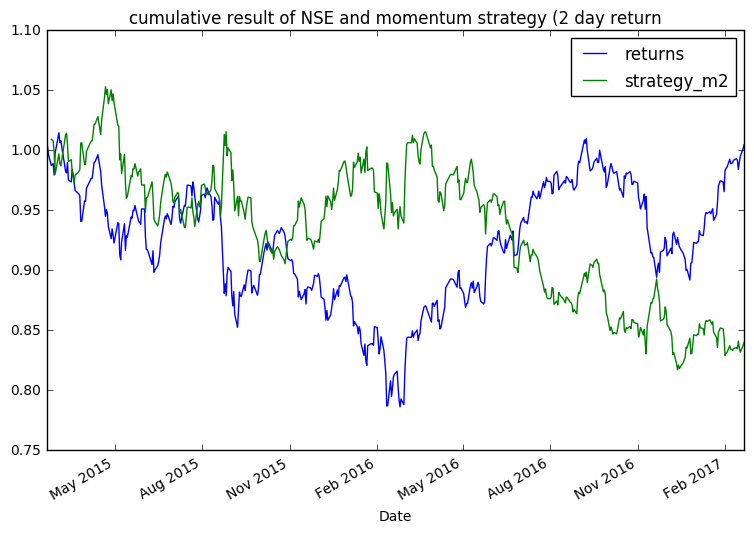

In [323]:
nse ['strategy_m2'] = nse ['position_m2'].shift(1) * nse ['returns']
nse [['returns', 'strategy_m2']].cumsum().apply(np.exp).plot(figsize = (9,6), title = "cumulative result of NSE and momentum strategy (2 day return")

In [324]:
nse [['returns', 'strategy_m2']].sum()

returns        0.004360
strategy_m2   -0.174787
dtype: float64

In [326]:
import pandas as pd
import datetime as dt

columns = ['timestamp', 'close','high','low','open','volume' ]

# template for API url

templ = 'http:://chartapi.finance.yahoo.com/instrument/1.0/%s/'
templ += 'chartdata;type = quote; range = 1d/csv'

"""
Parametrized url for AAPL for 1 min bar data looks as follows:

http:://chartapi.finance.yahoo.com/instrument/1.0/AAPL/chartdata;type = quote; range = 1d/csv'
"""


"\nParametrized url for AAPL for 1 min bar data looks as follows:\n\nhttp:://chartapi.finance.yahoo.com/instrument/1.0/AAPL/chartdata;type = quote; range = 1d/csv'\n"

In [330]:
def yahoo_intra_day (symbol):
    req = templ % (symbol) # template without string
    df = pd.read_csv (req, skiprows = 17, header = None) # skip 17 rows, no header
    df.columns = columns
    df ['timestamp'] = df ['timestamp'].apply (dt.datetime.fromtimestamp)
    return df.set_index('timestamp') # set the timestamp column as index
    
if __name__ == '__main__':
    df = yahoo_intra_day ('AAPL')
    print df.head()
    

URLError: <urlopen error no host given>

In [329]:
from yahoo_intra_day import yahoo_intra_day

ImportError: No module named yahoo_intra_day